In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
# sklearn.model_selection.train_test_split

import statsmodels.formula.api as smf
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data

newsdata = pd.read_csv("D:\\Jupyter\\classroom\\LinearRegression\\NewspaperData.csv")
newsdata

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
newsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [5]:
#check for missing value
newsdata.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
newsdata.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


# Correlation matrix

In [7]:
newsdata.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


# Scatterplot between variable along with histogram

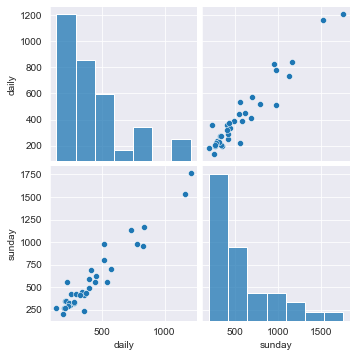

In [8]:
sns.set_style(style="darkgrid")
sns.pairplot(newsdata)

<AxesSubplot:xlabel='sunday', ylabel='Density'>

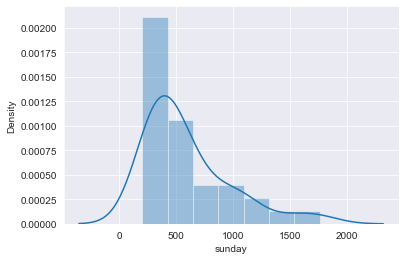

In [9]:
sns.distplot(newsdata['sunday'])

<AxesSubplot:xlabel='daily', ylabel='Density'>

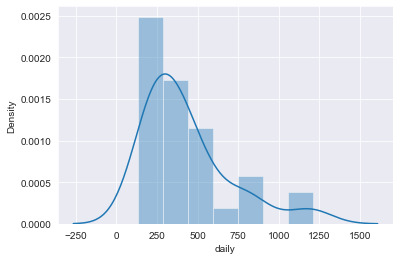

In [10]:
sns.distplot(newsdata['daily'])

# Preparing a model


In [11]:
#build model
import statsmodels.formula.api as smf
model = smf.ols('sunday~daily',data=newsdata).fit()

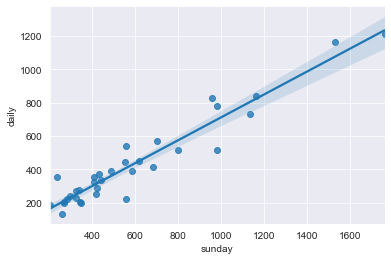

In [12]:
sns.regplot(x='sunday', y ='daily', data=newsdata);

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           6.02e-19
Time:                        17:36:05   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(model.predict)

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x0000019132F80A30>>


In [15]:
#coefficient
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [16]:
#t and p-values
print(model.tvalues,'\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [17]:
#r square
(model.rsquared, model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# predict for new data

In [18]:
#new data for prediction
new_data = pd.Series([200,300])

In [19]:
data_pred = pd.DataFrame(new_data,columns=['daily'])


In [20]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64